## Import Modules

In [14]:
from fbprophet import Prophet
import pandas as pd

## Initiate Model

In [15]:
# model = Prophet(growth = 'logistic')

## Read Data

In [16]:
df = pd.read_csv('final_lf_data.csv')

In [17]:
df

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192317,192317,8537.11,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:00:00
192318,192318,8554.19,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:15:00
192319,192319,8536.29,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:30:00
192320,192320,8510.32,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:45:00


In [18]:
df.head()

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192317,192317,8537.11,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:00:00
192318,192318,8554.19,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:15:00
192319,192319,8536.29,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:30:00
192320,192320,8510.32,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:45:00


## Multivariate Forecasting

In [21]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir']]

In [22]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [23]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0


In [24]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82
192321,2021-09-09 00:00:00,8430.02,28.0,26.0,88.92,50.0,9.4,100


In [25]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [126]:
mv_model = Prophet(growth='logistic')

In [127]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')

## Now add Train-Test Split

In [128]:
train_size = int(dfmv.shape[0]*0.7)

In [129]:
df_train = dfmv.iloc[:train_size]

In [130]:
# test_size = dfuv.shape[0] - train_size

In [131]:
df_test = dfmv[train_size:]

In [132]:
df_train['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_9840/1207476209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap'] = 6000


In [133]:
df_train

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,cap
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0,6000
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0,6000
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0,6000
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0,6000
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0,6000
...,...,...,...,...,...,...,...,...,...
134620,2020-11-03 04:45:00,4689.89,13.0,9.0,76.68,0.0,0.0,0,6000
134621,2020-11-03 05:00:00,4882.69,12.9,9.9,81.94,0.0,0.0,0,6000
134622,2020-11-03 05:15:00,5027.43,12.9,9.9,81.94,0.0,0.0,0,6000
134623,2020-11-03 05:30:00,5194.38,12.9,9.9,81.94,0.0,0.0,0,6000


## Fit model on Train Dataset

In [134]:
mv_model.fit(df_train)

## Save model

In [135]:
import pickle

In [136]:
import joblib

In [137]:
joblib.dump(mv_model, 'logistic_mv_all_model_good.pkl')

['logistic_mv_all_model_good.pkl']

In [138]:
saved_mv_model = joblib.load('logistic_mv_all_model_good.pkl')

In [139]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0
134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0
134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0
134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0
134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [140]:
df_test['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_9840/3138556019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cap'] = 6000


In [141]:
test_ds = df_test.drop(columns='y')

In [142]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir,cap
134625,2020-11-03 06:00:00,13.0,9.0,76.68,0.0,0.0,0,6000
134626,2020-11-03 06:15:00,13.0,9.0,76.68,0.0,0.0,0,6000
134627,2020-11-03 06:30:00,13.0,9.0,76.68,0.0,0.0,0,6000
134628,2020-11-03 06:45:00,13.0,9.0,76.68,0.0,0.0,0,6000
134629,2020-11-03 07:00:00,13.0,8.0,71.66,0.0,0.0,0,6000
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,29.0,26.8,87.64,70.3,7.8,82,6000
192318,2021-09-09 23:15:00,29.0,26.8,87.64,70.3,7.8,82,6000
192319,2021-09-09 23:30:00,29.0,26.8,87.64,70.3,7.8,82,6000
192320,2021-09-09 23:45:00,29.0,26.8,87.64,70.3,7.8,82,6000


In [143]:
# test_ds = pd.DataFrame(df_test['ds'])

In [144]:
# test_ds

## Make Forecast on Test Dataset

In [145]:
forecast = saved_mv_model.predict(test_ds)

In [146]:
test_forecast = forecast

In [147]:
test_forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02 00:00:00,6000.0,6000,3826.436732,6227.813666,6000.0,6000.0,-1008.914460,-1008.914460,-1008.914460,...,92.541718,92.541718,92.541718,66.124126,66.124126,66.124126,0.0,0.0,0.0,4991.085540
1,2020-01-02 00:15:00,6000.0,6000,3775.928546,6195.331213,6000.0,6000.0,-1038.662119,-1038.662119,-1038.662119,...,92.541718,92.541718,92.541718,66.204308,66.204308,66.204308,0.0,0.0,0.0,4961.337881
2,2020-01-02 00:30:00,6000.0,6000,3650.462733,6212.410762,6000.0,6000.0,-1063.052021,-1063.052021,-1063.052021,...,92.541718,92.541718,92.541718,66.284233,66.284233,66.284233,0.0,0.0,0.0,4936.947979
3,2020-01-02 00:45:00,6000.0,6000,3711.730459,6106.789221,6000.0,6000.0,-1082.243907,-1082.243907,-1082.243907,...,92.541718,92.541718,92.541718,66.363899,66.363899,66.363899,0.0,0.0,0.0,4917.756093
4,2020-01-02 01:00:00,6000.0,6000,3484.771023,5921.317724,6000.0,6000.0,-1278.598469,-1278.598469,-1278.598469,...,92.541718,92.541718,92.541718,66.443307,66.443307,66.443307,0.0,0.0,0.0,4721.401531


In [148]:
test_forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
57692,2021-12-31 22:45:00,6000.0,6000,3980.157854,6488.185442,6000.0,6000.0,-756.607773,-756.607773,-756.607773,...,92.541718,92.541718,92.541718,61.510367,61.510367,61.510367,0.0,0.0,0.0,5243.392227
57693,2021-12-31 23:00:00,6000.0,6000,3879.127090,6349.933459,6000.0,6000.0,-877.347820,-877.347820,-877.347820,...,92.541718,92.541718,92.541718,61.603940,61.603940,61.603940,0.0,0.0,0.0,5122.652180
57694,2021-12-31 23:15:00,6000.0,6000,3806.605899,6246.267124,6000.0,6000.0,-926.786842,-926.786842,-926.786842,...,92.541718,92.541718,92.541718,61.697265,61.697265,61.697265,0.0,0.0,0.0,5073.213158
57695,2021-12-31 23:30:00,6000.0,6000,3865.849548,6234.618038,6000.0,6000.0,-971.962866,-971.962866,-971.962866,...,92.541718,92.541718,92.541718,61.790343,61.790343,61.790343,0.0,0.0,0.0,5028.037134
57696,2021-12-31 23:45:00,6000.0,6000,3783.890508,6203.717613,6000.0,6000.0,-1012.228567,-1012.228567,-1012.228567,...,92.541718,92.541718,92.541718,61.883173,61.883173,61.883173,0.0,0.0,0.0,4987.771433


In [149]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02 00:00:00,4991.085540,3826.436732,6227.813666
1,2020-01-02 00:15:00,4961.337881,3775.928546,6195.331213
2,2020-01-02 00:30:00,4936.947979,3650.462733,6212.410762
3,2020-01-02 00:45:00,4917.756093,3711.730459,6106.789221
4,2020-01-02 01:00:00,4721.401531,3484.771023,5921.317724
...,...,...,...,...
57692,2021-12-31 22:45:00,5243.392227,3980.157854,6488.185442
57693,2021-12-31 23:00:00,5122.652180,3879.127090,6349.933459
57694,2021-12-31 23:15:00,5073.213158,3806.605899,6246.267124
57695,2021-12-31 23:30:00,5028.037134,3865.849548,6234.618038


## Plot test forecast with actual values

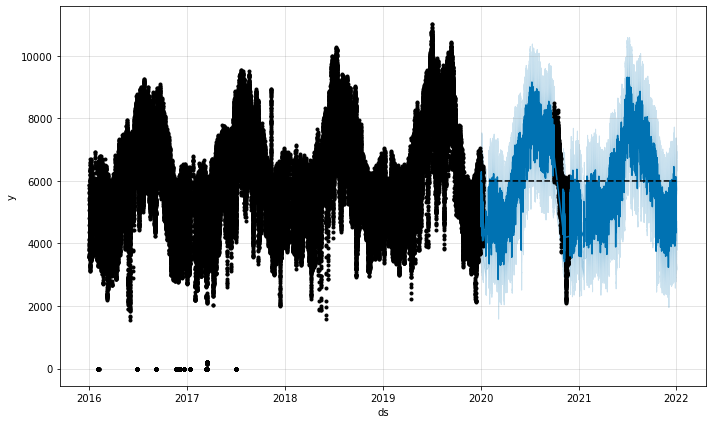

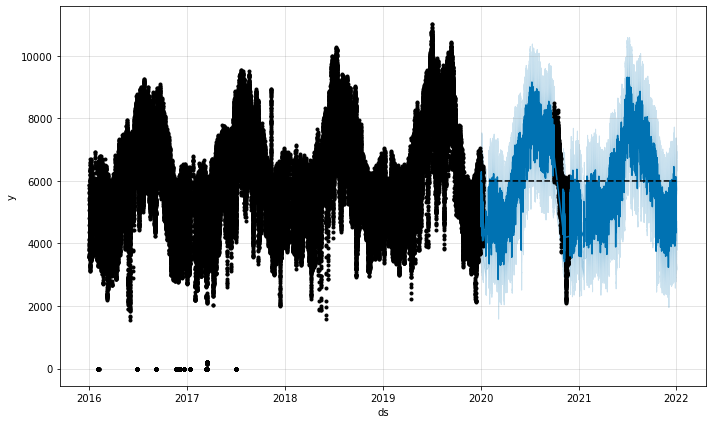

In [150]:
saved_mv_model.plot(test_forecast)

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

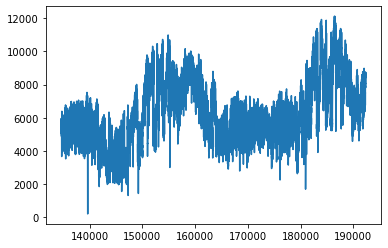

In [152]:
plt.plot(df_test['y'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [153]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,cap
134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0,6000
134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0,6000
134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0,6000
134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0,6000
134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0,6000
...,...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82,6000
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82,6000
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82,6000
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82,6000


In [154]:
test_forecast.reset_index(inplace=True)

In [155]:
df_test.reset_index(inplace=True)

In [156]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,cap
0,134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0,6000
1,134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0,6000
2,134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0,6000
3,134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0,6000
4,134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0,6000
...,...,...,...,...,...,...,...,...,...,...
57692,192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82,6000
57693,192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82,6000
57694,192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82,6000
57695,192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82,6000


In [157]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-01-02 00:00:00,6000.0,6000,3826.436732,6227.813666,6000.0,6000.0,-1008.914460,-1008.914460,...,92.541718,92.541718,92.541718,66.124126,66.124126,66.124126,0.0,0.0,0.0,4991.085540
1,1,2020-01-02 00:15:00,6000.0,6000,3775.928546,6195.331213,6000.0,6000.0,-1038.662119,-1038.662119,...,92.541718,92.541718,92.541718,66.204308,66.204308,66.204308,0.0,0.0,0.0,4961.337881
2,2,2020-01-02 00:30:00,6000.0,6000,3650.462733,6212.410762,6000.0,6000.0,-1063.052021,-1063.052021,...,92.541718,92.541718,92.541718,66.284233,66.284233,66.284233,0.0,0.0,0.0,4936.947979
3,3,2020-01-02 00:45:00,6000.0,6000,3711.730459,6106.789221,6000.0,6000.0,-1082.243907,-1082.243907,...,92.541718,92.541718,92.541718,66.363899,66.363899,66.363899,0.0,0.0,0.0,4917.756093
4,4,2020-01-02 01:00:00,6000.0,6000,3484.771023,5921.317724,6000.0,6000.0,-1278.598469,-1278.598469,...,92.541718,92.541718,92.541718,66.443307,66.443307,66.443307,0.0,0.0,0.0,4721.401531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57692,57692,2021-12-31 22:45:00,6000.0,6000,3980.157854,6488.185442,6000.0,6000.0,-756.607773,-756.607773,...,92.541718,92.541718,92.541718,61.510367,61.510367,61.510367,0.0,0.0,0.0,5243.392227
57693,57693,2021-12-31 23:00:00,6000.0,6000,3879.127090,6349.933459,6000.0,6000.0,-877.347820,-877.347820,...,92.541718,92.541718,92.541718,61.603940,61.603940,61.603940,0.0,0.0,0.0,5122.652180
57694,57694,2021-12-31 23:15:00,6000.0,6000,3806.605899,6246.267124,6000.0,6000.0,-926.786842,-926.786842,...,92.541718,92.541718,92.541718,61.697265,61.697265,61.697265,0.0,0.0,0.0,5073.213158
57695,57695,2021-12-31 23:30:00,6000.0,6000,3865.849548,6234.618038,6000.0,6000.0,-971.962866,-971.962866,...,92.541718,92.541718,92.541718,61.790343,61.790343,61.790343,0.0,0.0,0.0,5028.037134


In [158]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,cap
0,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0,6000
1,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0,6000
2,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0,6000
3,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0,6000
4,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0,6000
...,...,...,...,...,...,...,...,...,...
57692,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82,6000
57693,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82,6000
57694,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82,6000
57695,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82,6000


In [159]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-01-02 00:00:00,6000.0,6000,3826.436732,6227.813666,6000.0,6000.0,-1008.914460,-1008.914460,...,92.541718,92.541718,92.541718,66.124126,66.124126,66.124126,0.0,0.0,0.0,4991.085540
1,1,2020-01-02 00:15:00,6000.0,6000,3775.928546,6195.331213,6000.0,6000.0,-1038.662119,-1038.662119,...,92.541718,92.541718,92.541718,66.204308,66.204308,66.204308,0.0,0.0,0.0,4961.337881
2,2,2020-01-02 00:30:00,6000.0,6000,3650.462733,6212.410762,6000.0,6000.0,-1063.052021,-1063.052021,...,92.541718,92.541718,92.541718,66.284233,66.284233,66.284233,0.0,0.0,0.0,4936.947979
3,3,2020-01-02 00:45:00,6000.0,6000,3711.730459,6106.789221,6000.0,6000.0,-1082.243907,-1082.243907,...,92.541718,92.541718,92.541718,66.363899,66.363899,66.363899,0.0,0.0,0.0,4917.756093
4,4,2020-01-02 01:00:00,6000.0,6000,3484.771023,5921.317724,6000.0,6000.0,-1278.598469,-1278.598469,...,92.541718,92.541718,92.541718,66.443307,66.443307,66.443307,0.0,0.0,0.0,4721.401531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57692,57692,2021-12-31 22:45:00,6000.0,6000,3980.157854,6488.185442,6000.0,6000.0,-756.607773,-756.607773,...,92.541718,92.541718,92.541718,61.510367,61.510367,61.510367,0.0,0.0,0.0,5243.392227
57693,57693,2021-12-31 23:00:00,6000.0,6000,3879.127090,6349.933459,6000.0,6000.0,-877.347820,-877.347820,...,92.541718,92.541718,92.541718,61.603940,61.603940,61.603940,0.0,0.0,0.0,5122.652180
57694,57694,2021-12-31 23:15:00,6000.0,6000,3806.605899,6246.267124,6000.0,6000.0,-926.786842,-926.786842,...,92.541718,92.541718,92.541718,61.697265,61.697265,61.697265,0.0,0.0,0.0,5073.213158
57695,57695,2021-12-31 23:30:00,6000.0,6000,3865.849548,6234.618038,6000.0,6000.0,-971.962866,-971.962866,...,92.541718,92.541718,92.541718,61.790343,61.790343,61.790343,0.0,0.0,0.0,5028.037134


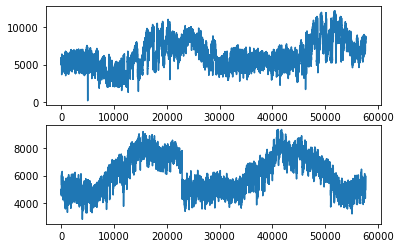

In [160]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

## Alignment Check

## Don't run alignment cells for now

In [49]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [50]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [51]:
# test_forecast.sort_index(inplace=True)

In [52]:
# df_test.sort_index(inplace=True)

In [53]:
# df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
test_forecast.drop(columns='index', inplace=True)

In [55]:
test_forecast['ds'].shape == df_test['ds'].shape

True

In [56]:
test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

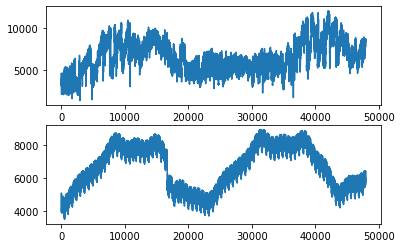

In [57]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

In [58]:
test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [59]:
df_test['ds'][0]

'2020-03-09 14:45:00'

In [65]:
test_forecast = test_forecast.loc[test_forecast.ds >= '2020-03-09 14:45:00']

In [67]:
test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2020-03-09 14:45:00,5900.296544,3171.916007,5481.531455,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3077.165376,5498.388928,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3066.869840,5327.756634,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,3079.373219,5423.713692,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
5,2020-03-09 15:45:00,5900.321564,3004.327760,5337.678558,5900.321564,5900.321564,-1729.323872,-1729.323872,-1729.323872,-239.006654,...,-91.000844,-91.000844,-91.000844,-1399.316374,-1399.316374,-1399.316374,0.0,0.0,0.0,4170.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2654.680851,8900.592688,3384.662319,8921.753386,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2590.503862,8722.852109,3384.626040,8921.964441,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,2517.721908,8791.146777,3384.589761,8922.175495,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2315.394237,8732.876186,3384.553482,8922.386549,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [68]:
df_test.iloc[:test_forecast.shape[0]]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47937,2021-09-09 22:45:00,8625.34,29.0,27.0,88.99,89.0,9.4,100
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82


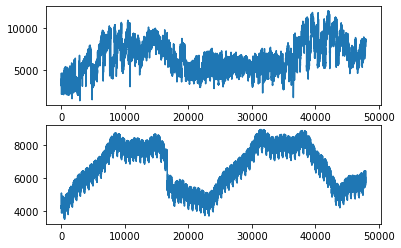

In [69]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

## Alignment Done

## Getting RMSE error

In [161]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_test['y'], test_forecast['yhat']))

In [162]:
rms

2256.378267163849

In [163]:
df_test['ds'][:-1]

0       2020-11-03 06:00:00
1       2020-11-03 06:15:00
2       2020-11-03 06:30:00
3       2020-11-03 06:45:00
4       2020-11-03 07:00:00
                ...        
57691   2021-09-09 22:45:00
57692   2021-09-09 23:00:00
57693   2021-09-09 23:15:00
57694   2021-09-09 23:30:00
57695   2021-09-09 23:45:00
Name: ds, Length: 57696, dtype: datetime64[ns]

In [164]:
test_forecast['ds']

0       2020-01-02 00:00:00
1       2020-01-02 00:15:00
2       2020-01-02 00:30:00
3       2020-01-02 00:45:00
4       2020-01-02 01:00:00
                ...        
57692   2021-12-31 22:45:00
57693   2021-12-31 23:00:00
57694   2021-12-31 23:15:00
57695   2021-12-31 23:30:00
57696   2021-12-31 23:45:00
Name: ds, Length: 57697, dtype: datetime64[ns]

In [165]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

In [166]:
# df_test

In [167]:
df_test['y'].mean()

6208.30795812605

## Plot forecast and test values on same scale

<function matplotlib.pyplot.show(close=None, block=None)>

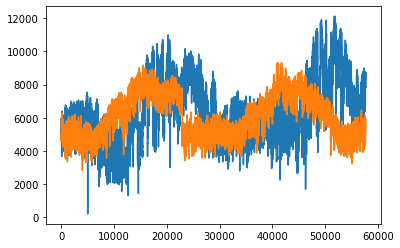

In [168]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

plt.plot(df_test['y'])
plt.plot(test_forecast['yhat'])
plt.show

## Do from here

In [169]:
mx = df_test['y'].max()
mn = df_test['y'].min()

In [170]:
nrmse = rms/(mx - mn)

In [171]:
nrmse

0.18960285593219212

## Create future Dataframes

In [95]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [96]:
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:15:00
2,2016-01-01 00:30:00
3,2016-01-01 00:45:00
4,2016-01-01 01:00:00


## Make future forecast

In [97]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
134822,2020-12-19 19:45:00,5767.066880,4520.098270,6990.705614
134823,2020-12-19 20:45:00,5791.977770,4638.550668,6997.430183
134824,2020-12-19 21:45:00,5607.835671,4354.073637,6877.913808
134825,2020-12-19 22:45:00,5323.499314,4141.306254,6635.186989
134826,2020-12-19 23:45:00,5055.218766,3769.207684,6302.589164


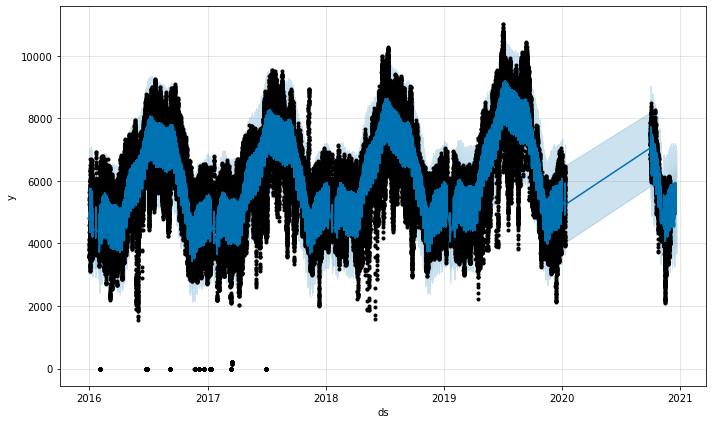

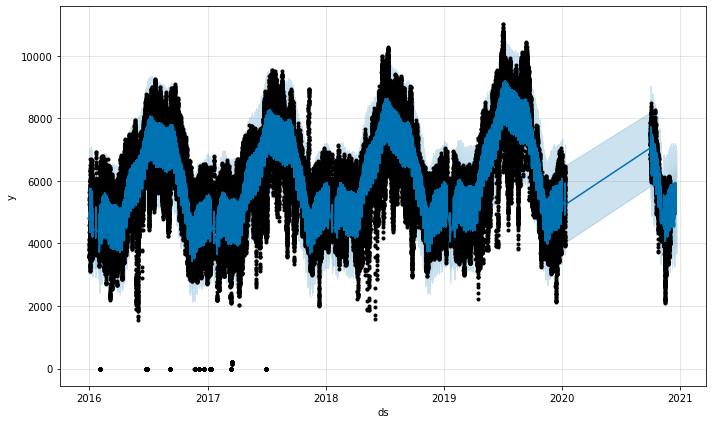

In [98]:
saved_mv_model.plot(forecast)